In [13]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.5/664.5 kB 17.5 MB/s eta 0:00:00


In [14]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown
# Used to securely store your API key
from google.colab import userdata


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [15]:
genai.configure(api_key="APIKEY")



**List models**
Now you're ready to call the Gemini API. Use list_models to see the available **Gemini models:**

**gemini-pro:** optimized for text-only prompts.
**gemini-pro-vision:** optimized for text-and-images prompts.




In [16]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


In [17]:
model = genai.GenerativeModel('gemini-pro')

In [18]:
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import pandas as pd
!pip install openai==0.28
import openai
from tqdm import tqdm
import time
x = pd.read_parquet('Train.parquet', engine='pyarrow')
x["context"].unique()

array(['sentimental', 'afraid', 'proud', 'faithful', 'terrified',
       'joyful', 'angry', 'sad', 'jealous', 'grateful', 'prepared',
       'embarrassed', 'excited', 'annoyed', 'lonely', 'ashamed', 'guilty',
       'surprised', 'nostalgic', 'confident', 'furious', 'disappointed',
       'caring', 'trusting', 'disgusted', 'anticipating', 'anxious',
       'hopeful', 'content', 'impressed', 'apprehensive', 'devastated'],
      dtype=object)

In [19]:
filtered_df = x[x['context'].isin(['joyful','sad','confident','afraid','angry','caring'])]
filtered_df = filtered_df.reset_index(drop=True)
print(filtered_df.count())


conv_id          14725
utterance_idx    14725
context          14725
prompt           14725
speaker_idx      14725
utterance        14725
selfeval         14725
tags             14725
dtype: int64


In [20]:
print(filtered_df.shape)
filtered_df.head()

(14725, 8)


,conv_id,utterance_idx,context,prompt,speaker_idx,utterance,selfeval,tags
0,hit:1_conv:2,1,afraid,i used to scare for darkness,2,it feels like hitting to blank wall when i se...,4|3|4_3|5|5,
1,hit:1_conv:2,2,afraid,i used to scare for darkness,3,Oh ya? I don't really see how,4|3|4_3|5|5,
2,hit:1_conv:2,3,afraid,i used to scare for darkness,2,dont you feel so.. its a wonder,4|3|4_3|5|5,
3,hit:1_conv:2,4,afraid,i used to scare for darkness,3,I do actually hit blank walls a lot of times b...,4|3|4_3|5|5,
4,hit:1_conv:2,5,afraid,i used to scare for darkness,2,i virtually thought so.. and i used to get sw...,4|3|4_3|5|5,


In [21]:
# dataset = filtered_df[["prompt","context","utterance"]]
# print(dataset.shape)
# dataset.head(100)


In [22]:
filtered_df = filtered_df.drop_duplicates(subset=['prompt'])


In [26]:
filtered_df = filtered_df.reset_index(drop=True)


                   conv_id  utterance_idx    context  \
0             hit:1_conv:2              1     afraid   
1             hit:3_conv:7              1     joyful   
2             hit:4_conv:8              1      angry   
3            hit:5_conv:10              1        sad   
4            hit:7_conv:15              1        sad   
...                    ...            ...        ...   
3381  hit:12414_conv:24828              1  confident   
3382  hit:12416_conv:24833              1     joyful   
3383  hit:12420_conv:24840              1  confident   
3384  hit:12421_conv:24842              1     afraid   
3385  hit:12423_conv:24846              1     afraid   

                                                 prompt  speaker_idx  \
0                          i used to scare for darkness            2   
1     I am very happy to have been first over 300 st...            7   
2                       I once lost my job and got mad.            4   
3     One year during christmas_comma_ 

In [28]:
print(filtered_df["prompt"].values)

[' i used to scare for darkness'
 'I am very happy to have been first over 300 students during this years at my enginering school'
 'I once lost my job and got mad.' ...
 'My boss informed me that I am in pole position of getting the promotion.'
 'I was in bed and i heard a loud noise in my kitchen. but i was home alone!'
 'My house burned down and I had to rescue my family_comma_ It was a chilly night.']


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Mean word count: 7.623449497932664
Max word count: 40
Most common words: [('got', 307), ('going', 272), ('really', 260), ('get', 250), ('happy', 237), ('last', 212), ('dog', 198), ('time', 190), ('work', 187), ('day', 171)]


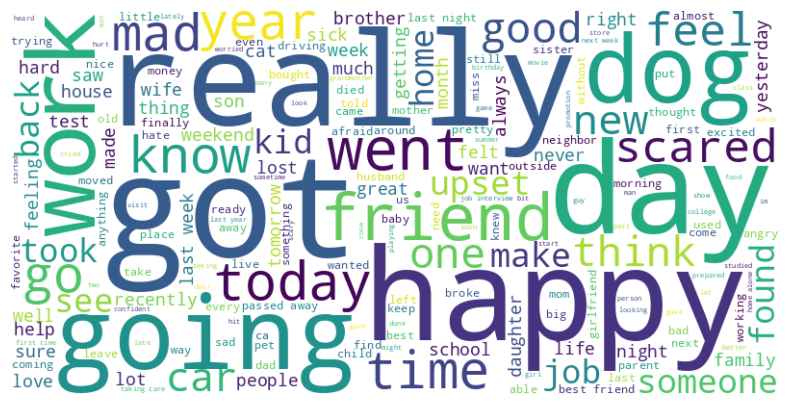

Topic 0:
mad yesterday scared dog lost get work always broke night

Topic 1:
going work get really go happy someone day home test

Topic 2:
passed time away like ca one upset feel grandmother going

Topic 3:
got happy new last car get see really week night

Topic 4:
dog friend care job took died years sick got felt



In [29]:
#Performing statistical analysis on text data in Python typically involves several steps. Here's a basic outline along with some sample code:

#1. **Preprocessing**: This step involves cleaning and preparing your text data for analysis. Common preprocessing steps include tokenization, lowercasing, removing punctuation, and removing stopwords.

#2. **Exploratory Data Analysis (EDA)**: Explore the characteristics of your text data using descriptive statistics and visualizations.

#3. **Feature Extraction**: Convert the text data into numerical features that can be used for analysis. Common techniques include Bag-of-Words, TF-IDF, word embeddings (like Word2Vec or GloVe), or more advanced methods like BERT embeddings.

#4. **Statistical Analysis**: Apply statistical methods to analyze the text data. This could include techniques like hypothesis testing, regression analysis, or clustering.

#Here's some sample code to perform these steps using Python libraries such as NLTK, scikit-learn, and pandas:

#```python
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Step 1: Preprocessing
def preprocess(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Lowercasing
    tokens = [token.lower() for token in tokens]
    # Remove punctuation
    tokens = [token for token in tokens if token.isalnum()]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return " ".join(tokens)

# Step 2: Exploratory Data Analysis (EDA)
def explore_data(text_data):
    # Basic statistics
    word_count = text_data.apply(lambda x: len(x.split()))
    print("Mean word count:", word_count.mean())
    print("Max word count:", word_count.max())
    # Word frequency
    word_freq = nltk.FreqDist(nltk.word_tokenize(" ".join(text_data)))
    print("Most common words:", word_freq.most_common(10))
    # Word cloud (optional)
    from wordcloud import WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Step 3: Feature Extraction
def extract_features(text_data):
    # Bag-of-Words representation
    count_vectorizer = CountVectorizer()
    bow_matrix = count_vectorizer.fit_transform(text_data)
    # TF-IDF representation
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_matrix = tfidf_vectorizer.fit_transform(text_data)
    return bow_matrix, tfidf_matrix, count_vectorizer, tfidf_vectorizer

# Step 4: Statistical Analysis
def statistical_analysis(text_data, feature_matrix, vectorizer):
    # Example: Topic modeling using Latent Dirichlet Allocation (LDA)
    lda = LatentDirichletAllocation(n_components=5, random_state=42)
    lda.fit(feature_matrix)
    # Display topics
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(lda.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))
        print()

# Sample text data
text_data = pd.Series(filtered_df["prompt"].values)

# Preprocess the text data
text_data_preprocessed = text_data.apply(preprocess)

# Explore the data
explore_data(text_data_preprocessed)

# Extract features
bow_matrix, tfidf_matrix, count_vectorizer, tfidf_vectorizer = extract_features(text_data_preprocessed)

# Perform statistical analysis
# Perform statistical analysis
statistical_analysis(text_data_preprocessed, bow_matrix, count_vectorizer)
#```

#This code provides a basic framework for performing statistical analysis on text data in Python. You can customize and extend it based on your specific requirements and the characteristics of your text data.

                   conv_id  utterance_idx    context  \
0             hit:1_conv:2              1     afraid   
1             hit:3_conv:7              1     joyful   
2             hit:4_conv:8              1      angry   
3            hit:5_conv:10              1        sad   
4            hit:7_conv:15              1        sad   
...                    ...            ...        ...   
3381  hit:12414_conv:24828              1  confident   
3382  hit:12416_conv:24833              1     joyful   
3383  hit:12420_conv:24840              1  confident   
3384  hit:12421_conv:24842              1     afraid   
3385  hit:12423_conv:24846              1     afraid   

                                                 prompt  speaker_idx  \
0                          i used to scare for darkness            2   
1     I am very happy to have been first over 300 st...            7   
2                       I once lost my job and got mad.            4   
3     One year during christmas_comma_ 

In [ ]:
# Empty list to store selected DataFrames
selected_dfs = []
promptlist=[]
contextlist=[]

context_values = ['joyful','sad','confident','afraid','angry','caring']

# Iterate over each context value
for context1 in context_values:
    # Filter DataFrame based on current context value
    context_df = filtered_df[filtered_df['context'] == context1]
    # Randomly select 10 records
    selected_df = context_df.sample(n=15, random_state=0)  # Set random_state for reproducibility
    # Append selected DataFrame to list
    selected_dfs.append(selected_df)

# Concatenate all selected DataFrames into one DataFrame
result_df = pd.concat(selected_dfs)

# Print result DataFrame
#print(result_df)
result_df.reset_index(drop=True, inplace=True)
print(result_df)

                 conv_id  utterance_idx context  \
0     hit:1863_conv:3727              1  joyful   
1     hit:2703_conv:5407              1  joyful   
2     hit:2042_conv:4084              1  joyful   
3     hit:2230_conv:4460              1  joyful   
4     hit:2955_conv:5910              1  joyful   
..                   ...            ...     ...   
85    hit:3104_conv:6208              1  caring   
86    hit:2941_conv:5882              1  caring   
87    hit:1714_conv:3429              1  caring   
88   hit:5717_conv:11434              1  caring   
89  hit:10989_conv:21978              1  caring   

                                               prompt  speaker_idx  \
0   I remember when my first child was born.  I wa...          294   
1      I was so happy last week when it was fridaaay!          238   
2   I was going to a concert once and then I learn...          291   
3           I'm always happy around my two daughters.          225   
4   Tomorrow is my birthday! I'm so h

In [ ]:
dataset = result_df[["prompt","context","utterance"]]
print(dataset.shape)

(90, 3)


In [ ]:
dataset

,prompt,context,utterance
0,I remember when my first child was born. I wa...,joyful,I remember when my first child was born. I was...
1,I was so happy last week when it was fridaaay!,joyful,I was so happy last week when it was fridaaay!
2,I was going to a concert once and then I learn...,joyful,Hi friend_comma_ did you ever win a drawing th...
3,I'm always happy around my two daughters.,joyful,My two daughters make me happy in my life.
4,Tomorrow is my birthday! I'm so happy its fina...,joyful,My birthday is tomorrow
...,...,...,...
85,I am going to be a class mom this year. I care...,caring,I am volunteering to be a class mom this year.
86,I helped a lady put her groceries in her car t...,caring,I helped an old lady with her groceries the ot...
87,I am the caretaker of my grandmother.,caring,I take full care of my grandmother!
88,I used to babysit my little brother all the time.,caring,I was basically a second mother to my little b...


In [ ]:
prompt=[]
context=[]
GPTEmotion=[]


for i in range(0,dataset["prompt"].nunique()):
    message = dataset["prompt"][i]
    cont = dataset["context"][i]
    promptgpt = f"""Classify the following  message as the below output.
    Message: '{message}'.
    The output should only contain one word from the following: 'joyful','sad','confident','afraid','angry','caring'.
    """
    #Context= """ Act as a Human Emotion Detector for a given message.
    #I am going to provide you the message that can be defined as a specific emotion and you will respond with the output that contains only the one emotion from 'joyful','sad','confident','afraid','angry','caring'  """

    #message = [ { 'role':'system' , 'content': Context},
             # {'role':'user', 'content':promptgpt}]

    messages = [{'role':'user',
     'parts': [promptgpt]}
    ]
    print("Before the sleep statement")
    time.sleep(20)
    response = model.generate_content(messages)
    # List of words to check
    words_to_check = ['text']
    try:
      response.text
      text_value = response.text
    except Exception as e:
      text_value = ' '
      print(f'{type(e).__name__}: {e}')


    # # Check if any of the words are present in the response
    # if any(word in response for word in words_to_check):
    #   text_value = response.text
    # else:
    #   text_value = ''

    #GPTRes = response.text
    prompt.append(message)
    context.append(cont)
    GPTEmotion.append(text_value)

Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
ValueError: The `response.text` quick accessor only works when the response contains a valid `Part`, but none was returned. Check the `candidate.safety_ratings` to see if the response was blocked.
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
ValueError: The `response.text` quick accessor only works when the response contains a valid `Part`, but none was returned. Check the `candidate.safety_ratings` to see if the response was blocked.
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the sleep statement
Before the s

In [ ]:
d={'Prompt':prompt,'Context':context,'GPT Emotion':GPTEmotion}
final=pd.DataFrame(d)


In [ ]:
final

,Prompt,Context,GPT Emotion
0,I remember when my first child was born. I wa...,joyful,joyful
1,I was so happy last week when it was fridaaay!,joyful,joyful
2,I was going to a concert once and then I learn...,joyful,joyful
3,I'm always happy around my two daughters.,joyful,
4,Tomorrow is my birthday! I'm so happy its fina...,joyful,joyful
...,...,...,...
85,I am going to be a class mom this year. I care...,caring,
86,I helped a lady put her groceries in her car t...,caring,
87,I am the caretaker of my grandmother.,caring,
88,I used to babysit my little brother all the time.,caring,


In [ ]:
def get_non_null_df(df):

  # Assuming the column name is 'column_name'
  column_name = 'GPT Emotion'  # Replace with the actual column name
  filtered_df = df[df[column_name] != ' ']
  return filtered_df

# Example usage:
final = get_non_null_df(final)
print(final)

final.reset_index(drop=True, inplace=True)
print(final)

                                               Prompt Context GPT Emotion
0   I remember when my first child was born.  I wa...  joyful      joyful
1      I was so happy last week when it was fridaaay!  joyful      joyful
2   I was going to a concert once and then I learn...  joyful      joyful
4   Tomorrow is my birthday! I'm so happy its fina...  joyful      joyful
5        I won the lottery last week. I was so happy.  joyful      joyful
..                                                ...     ...         ...
71  I woke up this morning and my truck had a flat...   angry         sad
72  I hate it when I see people get bullied. It ma...   angry       angry
74       I was pretty mad when I got fired last year.   angry       angry
76  I feel these 2 cats everyday_comma_ and they a...  caring      afraid
77  I can start to see my mother showing early sig...  caring         sad

[74 rows x 3 columns]
                                               Prompt Context GPT Emotion
0   I remember 

In [ ]:
final[final['GPT Emotion'] != ' ']

,Prompt,Context,GPT Emotion
0,I remember when my first child was born. I wa...,joyful,joyful
1,I was so happy last week when it was fridaaay!,joyful,joyful
2,I was going to a concert once and then I learn...,joyful,joyful
3,Tomorrow is my birthday! I'm so happy its fina...,joyful,joyful
4,I won the lottery last week. I was so happy.,joyful,joyful
...,...,...,...
69,I woke up this morning and my truck had a flat...,angry,sad
70,I hate it when I see people get bullied. It ma...,angry,angry
71,I was pretty mad when I got fired last year.,angry,angry
72,I feel these 2 cats everyday_comma_ and they a...,caring,afraid


In [ ]:
# Compute accuracy
accuracy = accuracy_score(final['GPT Emotion'], final['Context'])

# Compute other classification metrics (e.g., precision, recall, F1-score)
classification_metrics = classification_report(final['GPT Emotion'], final['Context'])

# Print accuracy and classification report
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_metrics)

Accuracy: 0.8783783783783784
Classification Report:
              precision    recall  f1-score   support

      afraid       0.93      0.82      0.87        17
       angry       0.71      1.00      0.83        10
      caring       0.00      0.00      0.00         0
   confident       0.93      1.00      0.97        14
      joyful       1.00      1.00      1.00        14
         sad       0.93      0.68      0.79        19

    accuracy                           0.88        74
   macro avg       0.75      0.75      0.74        74
weighted avg       0.92      0.88      0.89        74



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
